# Running Temperature Analysis

This notebook is meant to be updated in a running fashion.

In [1]:
day, month, year = '1', '1', '2019'

In [9]:
import ExpFile as exp
from importlib import reload
from matplotlib.pyplot import *
%matplotlib inline
exp.setPath(day, month, year)
import AnalysisHelpers as ah
reload(ah);
import datetime
import warnings 
warnings.filterwarnings('module')
import Miscellaneous as misc

In [3]:
import plotly.offline as pltly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True);

In [4]:
from matplotlib.pyplot import *
from matplotlib import rcParams
from matplotlib import style
import matplotlib.pyplot as plt
%matplotlib inline

# ## set matplotlib plot defaults :D
# Style controls many default colors in matplotlib plots.
# Change the following if you don't like dark backgrounds. Many other options.
import matplotlib as mpl

if True:
    # My Dark Settings
    style.use(['dark_background'])
    c = '#0A0A0A'
    mpl.rcParams['axes.facecolor'] = '#000000'
    mpl.rcParams['figure.edgecolor'] = c
    mpl.rcParams['figure.facecolor'] = c
else:
    # My Light Settings
    style.use(['default'])
    c = '#FFFFFF'
    mpl.rcParams['axes.facecolor'] = '#FFFFFF'
    mpl.rcParams['figure.edgecolor'] = c
    mpl.rcParams['figure.facecolor'] = c    
# the default cycling of colors in this mode isn't very good.
#rcParams['axes.prop_cycle'] = ("cycler('color', ['r','c','g','#FFFFFF','b']) + cycler('marker', ['o','v','<','>','^'])")
### General
rcParams['figure.figsize'] = (25.0, 8.0)
rcParams['axes.grid'] = True
rcParams['axes.formatter.useoffset'] = False
rcParams['grid.alpha'] = 0.15
rcParams['axes.formatter.limits'] = (-3,3)
# jet is awful.
rcParams['image.cmap'] = 'viridis'
#rcParams['image.cmap'] = dark_viridis_cmap
# to see all available options, decomment this line.
# print(mpl.rcParams)
rcParams['font.size'] = 14

# By Year

## 2020

In [16]:
year = '2020'
times = []
temps = [[],[],[],[]]
for month in ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']:
    print(month)
    for d in range(1,31):
        day = str(d)
        exp.setPath(day,month,year)
        reload(ah)
        try:
            xpts, data = ah.Temperature(show=False)
            for x in xpts:
                times.append(datetime.datetime.strptime(year+':'+month+':'+day + ':' + x, '%Y:%B:%d:%H:%M'))
            for i in range(4):
                temps[i] += list(data[3*(i+1)])
        except FileNotFoundError:
            pass

January
February
March
April
May
June
July
August
September
October
November
December


### correct for occational bad values

In [17]:
bad = []
for i, (time, ts) in enumerate(zip(times, misc.transpose(temps))):
    for t in ts:
        try:
            x = float(t)
            if x <= 0:
                raise ValueError()
        except ValueError:
            bad.append(i)
            break
cTemps = [[float(temp[i]) for i in range(len(temp)) if i not in bad ] for temp in temps] 
cTimes = [times[i] for i in range(len(times)) if i not in bad ]

### plot

Text(0.5, 1.0, '2020 Temperature Lab Record')

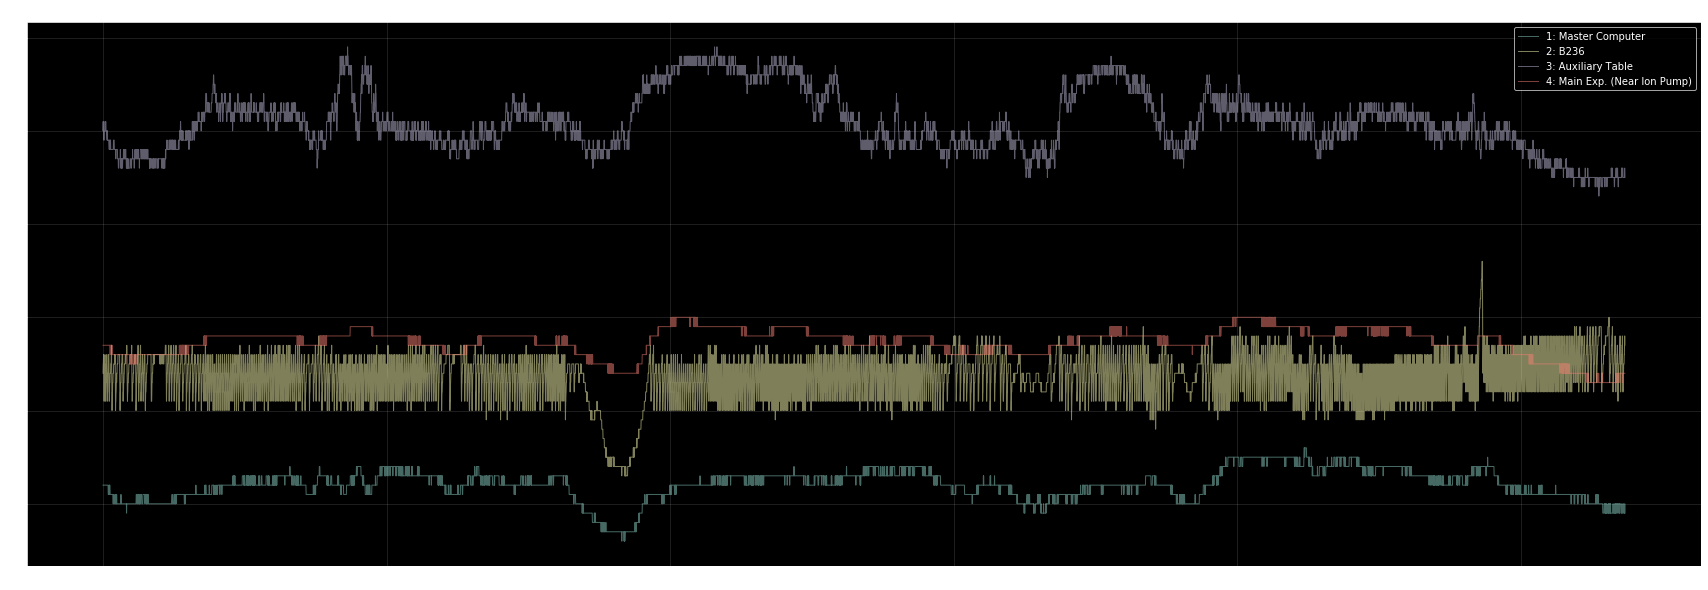

In [18]:
legends = ['1: Master Computer', '2: B236', '3: Auxiliary Table', '4: Main Exp. (Near Ion Pump)']
d = []
fig, ax = subplots(figsize=(30,10))
for t,l in zip(cTemps, legends):
    ax.plot(cTimes,t,label=l, alpha=0.5, linewidth=1)
legend()
ax.set_title('2020 Temperature Lab Record')

In [ ]:
legends = ['1: Master Computer', '2: B236', '3: Auxiliary Table', '4: Main Exp. (Near Ion Pump)']
d = []
for t,l in zip(cTemps, legends):
    d.append(go.Scatter(x=cTimes,y=t,name=l, line = {'width':0.5}))
layout = go.Layout( title='Temperature Data ' + year,
                    xaxis=dict(title='Time'),
                    yaxis=dict( title='Temperature (C)' ),
                    #width=1450,
                    height=800 )
fig = go.Figure(data=d, layout=layout)
pltly.iplot(fig)

## 2019

In [7]:
year = '2019'
times = []
temps = [[],[],[],[]]
for month in ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']:
    print(month)
    for d in range(1,31):
        day = str(d)
        exp.setPath(day,month,year)
        reload(ah)
        try:
            xpts, data = ah.Temperature(show=False)
            for x in xpts:
                times.append(datetime.datetime.strptime(year+':'+month+':'+day + ':' + x, '%Y:%B:%d:%H:%M'))
            for i in range(4):
                temps[i] += list(data[3*(i+1)])
        except FileNotFoundError:
            pass

### correct for occational bad values

In [10]:
bad = []
for i, (time, ts) in enumerate(zip(times, misc.transpose(temps))):
    for t in ts:
        try:
            x = float(t)
            if x <= 0:
                raise ValueError()
        except ValueError:
            bad.append(i)
            break
cTemps = [[float(temp[i]) for i in range(len(temp)) if i not in bad ] for temp in temps] 
cTimes = [times[i] for i in range(len(times)) if i not in bad ]

### plot

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\events.py:88: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



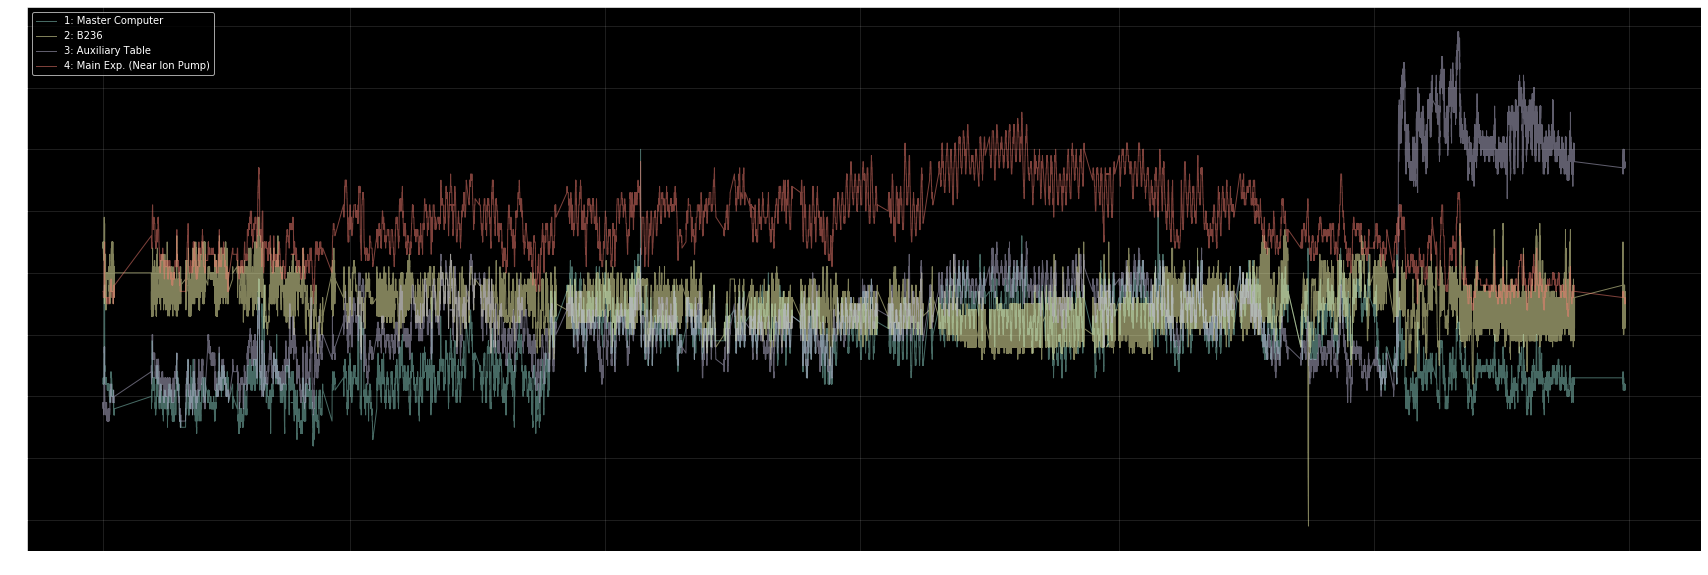

In [11]:
legends = ['1: Master Computer', '2: B236', '3: Auxiliary Table', '4: Main Exp. (Near Ion Pump)']
d = []
fig, ax = subplots(figsize=(30,10))
for t,l in zip(cTemps, legends):
    ax.plot(cTimes,t,label=l, alpha=0.5, linewidth=1)
plt.legend()
ax.set_title('2019 Lab Temperature Record (T)')

In [ ]:
legends = ['1: Master Computer', '2: B236', '3: Auxiliary Table', '4: Main Exp. (Near Ion Pump)']
d = []
for t,l in zip(cTemps, legends):
    d.append(go.Scatter(x=cTimes,y=t,name=l, line = {'width':0.5}))
layout = go.Layout( title='Temperature Data ' + year,
                    xaxis=dict(title='Time'),
                    yaxis=dict( title='Temperature (C)' ),
                    #width=1450,
                    height=800 )
fig = go.Figure(data=d, layout=layout)
pltly.iplot(fig)

## 2018

### gather data

In [13]:
year = '2018'
times = []
temps = [[],[],[],[]]
for month in ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']:
    print(month)
    for d in range(1,31):
        day = str(d)
        exp.setPath(day,month,year)
        reload(ah)
        try:
            xpts, data = ah.Temperature(show=False)
            for x in xpts:
                times.append(datetime.datetime.strptime(year+':'+month+':'+day + ':' + x, '%Y:%B:%d:%H:%M'))
            for i in range(4):
                temps[i] += list(data[3*(i+1)])
        except FileNotFoundError:
            pass

January
February
March
April
May
June
July
August
September
October
November
December


### correct for occational bad values

In [14]:
bad = []
for i, (time, ts) in enumerate(zip(times, misc.transpose(temps))):
    for t in ts:
        try:
            x = float(t)
            if x <= 0:
                raise ValueError()
        except ValueError:
            bad.append(i)
            break
cTemps = [[float(temp[i]) for i in range(len(temp)) if i not in bad ] for temp in temps] 
cTimes = [times[i] for i in range(len(times)) if i not in bad ]

### plot

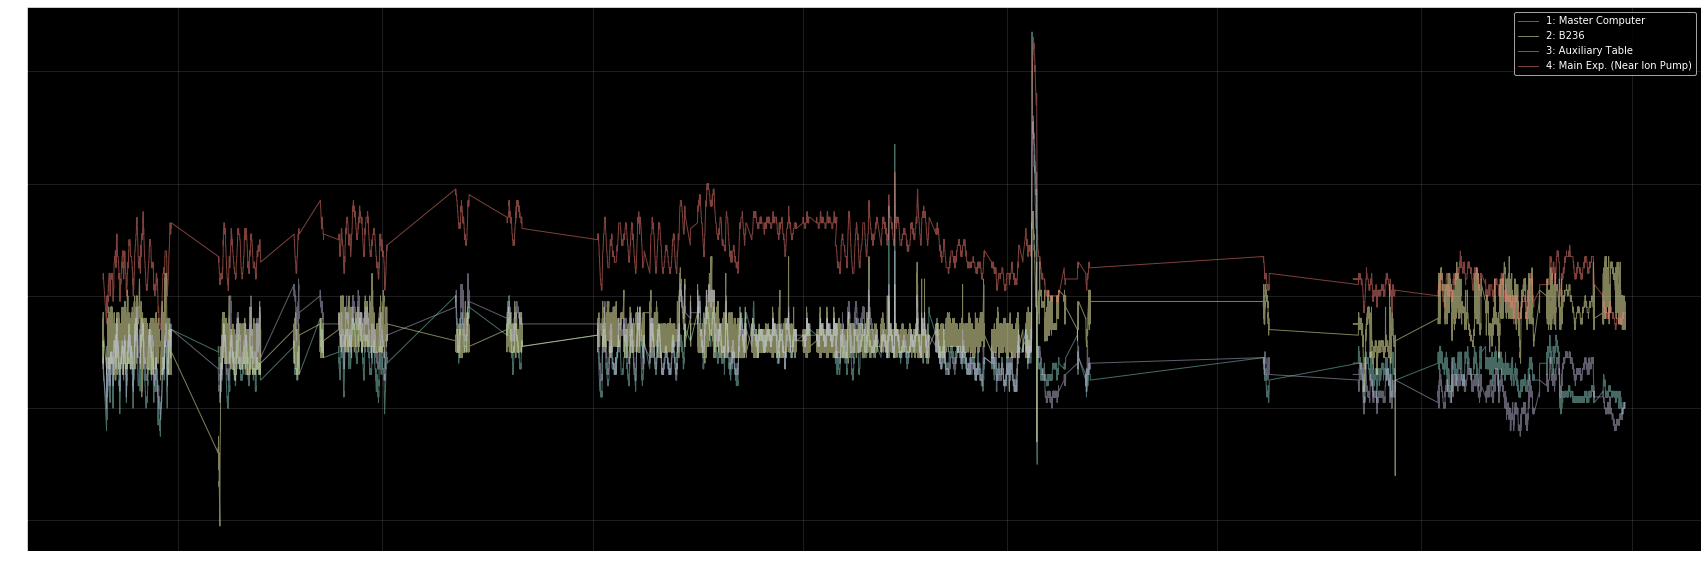

In [15]:
legends = ['1: Master Computer', '2: B236', '3: Auxiliary Table', '4: Main Exp. (Near Ion Pump)']
d = []
fig, ax = subplots(figsize=(30,10))
for t,l in zip(cTemps, legends):
    ax.plot(cTimes,t,label=l, alpha=0.5, linewidth=1)
legend()
ax.set_title('2018 Lab Temperature Record')

In [ ]:
legends = ['1: Master Computer', '2: B236', '3: Auxiliary Table', '4: Main Exp. (Near Ion Pump)']
d = []
for t,l in zip(cTemps, legends):
    d.append(go.Scatter(x=cTimes,y=t,name=l, line = {'width':0.5}))
layout = go.Layout( title='Temperature Data ' + year,
                    xaxis=dict(title='Time'),
                    yaxis=dict( title='Temperature (C)' ),
                    #width=1450,
                    height=800 )
fig = go.Figure(data=d, layout=layout)
pltly.iplot(fig)

# By Month

## March

In [137]:
month = 'March'

In [138]:
times = []
temps = [[],[],[],[]]
for d in range(1,28):
    day = str(d)
    exp.setPath(day,month,year)
    reload(ah)
    try:
        xpts, data = ah.Temperature(show=False)
        for x in xpts:
            times.append(datetime.datetime.strptime('2018:'+month+':'+day + ':' + x, '%Y:%B:%d:%H:%M'))
        for i in range(4):
            temps[i] += list(data[3*(i+1)])
    except FileNotFoundError:
        pass

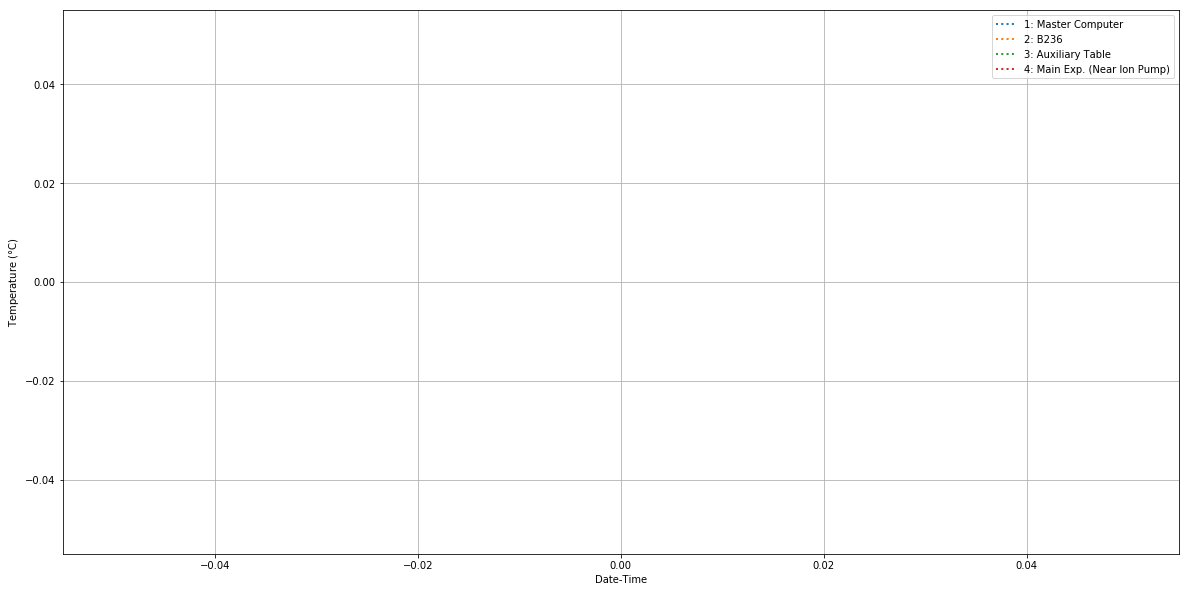

In [139]:
figure(figsize=(20,10))
grid(True)
ylabel('Temperature ($\degree$C)')
xlabel('Date-Time')
legends = ['1: Master Computer', '2: B236', '3: Auxiliary Table', '4: Main Exp. (Near Ion Pump)']
for t,l in zip(temps, legends):
    plot(times,t, '.:', label=l,markersize=0.1, lw=0.5)
leg = legend();
for legobj in leg.legendHandles:
    legobj.set_linewidth(2.0)


## April

In [132]:
month = 'April'

In [135]:
times = []
temps = [[],[],[],[]]
for d in range(1,28):
    day = str(d)
    exp.setPath(day,month,year)
    reload(ah)
    try:
        xpts, data = ah.Temperature(show=False)
        for x in xpts:
            times.append(datetime.datetime.strptime('2018:'+month+':'+day + ':' + x, '%Y:%B:%d:%H:%M'))
        for i in range(4):
            temps[i] += list(data[3*(i+1)])
    except FileNotFoundError:
        pass

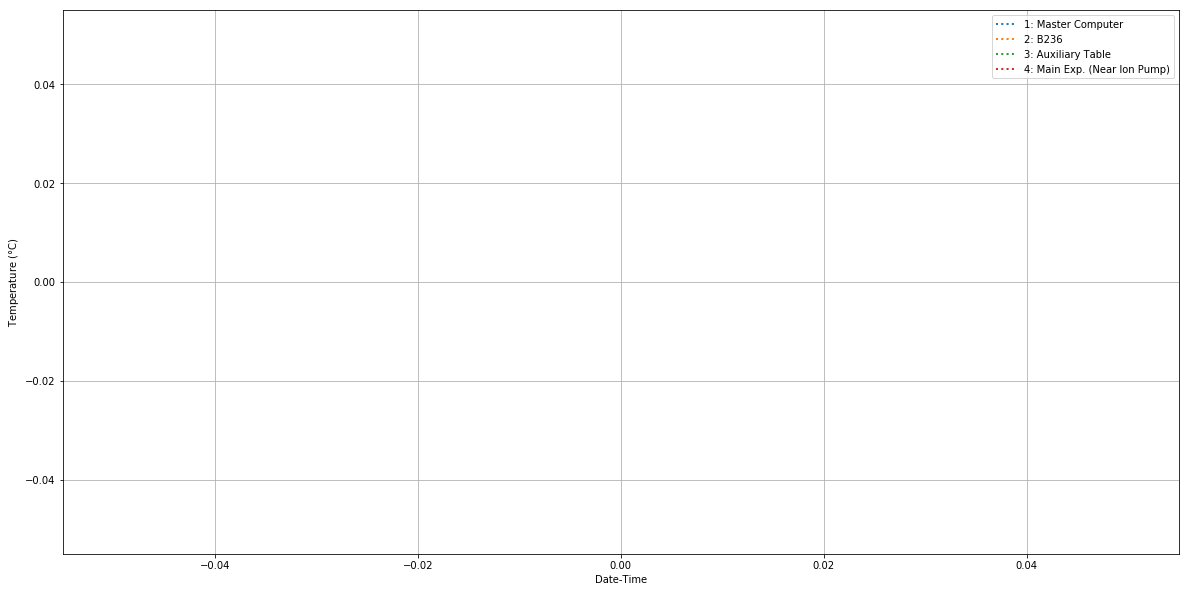

In [136]:
figure(figsize=(20,10))
grid(True)
ylabel('Temperature ($\degree$C)')
xlabel('Date-Time')
legends = ['1: Master Computer', '2: B236', '3: Auxiliary Table', '4: Main Exp. (Near Ion Pump)']
for t,l in zip(temps, legends):
    plot(times,t, '.:', label=l,markersize=0.1, lw=0.5)
leg = legend();
for legobj in leg.legendHandles:
    legobj.set_linewidth(2.0)


## May

In [129]:
month = 'May'

In [141]:
times = []
temps = [[],[],[],[]]
for d in range(1,28):
    day = str(d)
    exp.setPath(day,month,year)
    reload(ah)
    try:
        xpts, data = ah.Temperature(show=False)
        for x in xpts:
            times.append(datetime.datetime.strptime('2018:'+month+':'+day + ':' + x, '%Y:%B:%d:%H:%M'))
        for i in range(4):
            temps[i] += list(data[3*(i+1)])
    except FileNotFoundError:
        pass

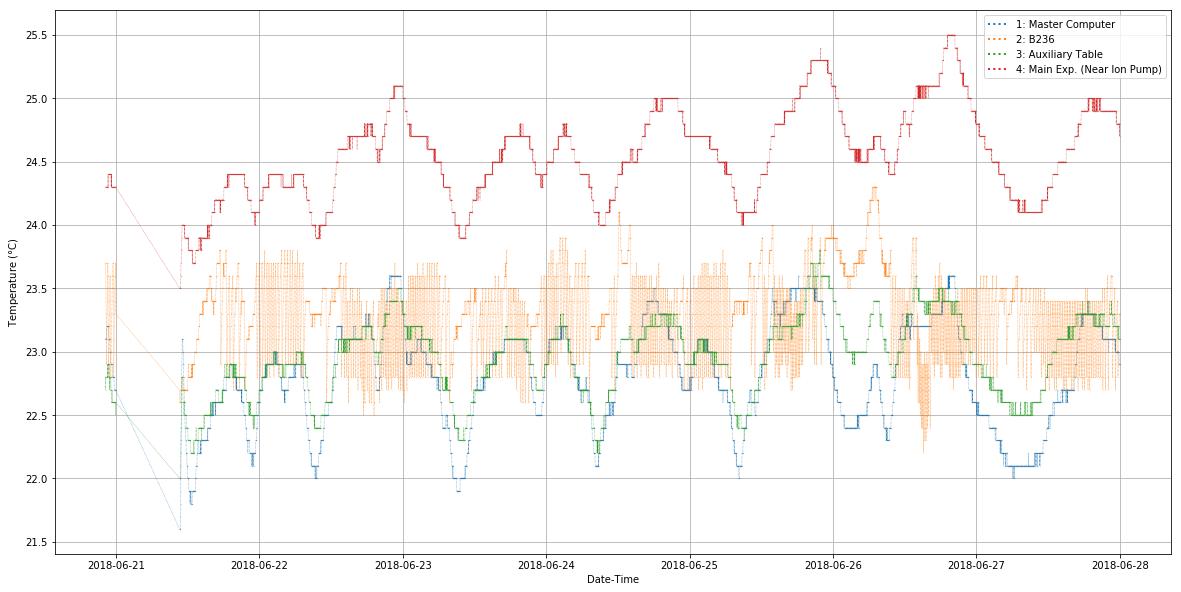

In [131]:
figure(figsize=(20,10))
grid(True)
ylabel('Temperature ($\degree$C)')
xlabel('Date-Time')
legends = ['1: Master Computer', '2: B236', '3: Auxiliary Table', '4: Main Exp. (Near Ion Pump)']
for t,l in zip(temps, legends):
    plot(times,t, '.:', label=l,markersize=0.1, lw=0.5)
leg = legend();
for legobj in leg.legendHandles:
    legobj.set_linewidth(2.0)


## June

In [104]:
times = []
temps = [[],[],[],[]]
for d in range(1,28):
    day = str(d)
    exp.setPath(day,month,year)
    reload(ah)
    try:
        xpts, data = ah.Temperature(show=False)
        for x in xpts:
            times.append(datetime.datetime.strptime('2018:June:'+day + ':' + x, '%Y:%B:%d:%H:%M'))
        for i in range(4):
            temps[i] += list(data[3*(i+1)])
    except FileNotFoundError:
        pass

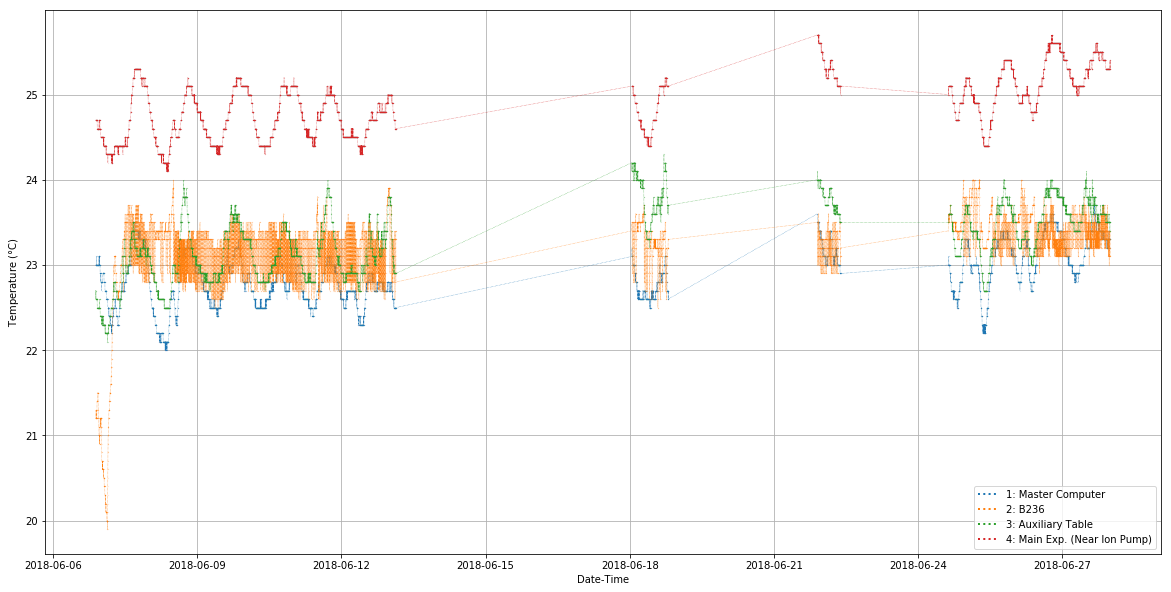

In [128]:
figure(figsize=(20,10))
grid(True)
ylabel('Temperature ($\degree$C)')
xlabel('Date-Time')
legends = ['1: Master Computer', '2: B236', '3: Auxiliary Table', '4: Main Exp. (Near Ion Pump)']
for t,l in zip(temps, legends):
    plot(times,t, '.:', label=l,markersize=0.1, lw=0.5)
leg = legend();
for legobj in leg.legendHandles:
    legobj.set_linewidth(2.0)
